In [1]:
import matplotlib.pyplot as plt
import numpy as np
import data 
import models 
import plot_functions
from pymatreader import read_mat
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut, StratifiedKFold
#from keras.models import Sequential
#from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import nnmodels

## Initial 

In [2]:
main_path = "/mnt/projects/USS_MEP/COIL_ORIENTATION"
filelist = data.get_all_paths(main_path)
X, y, groups, list_subjects = data.get_all_data(filelist)
X_norm = data.normalize_X(X, groups)

##### Plot specific subject

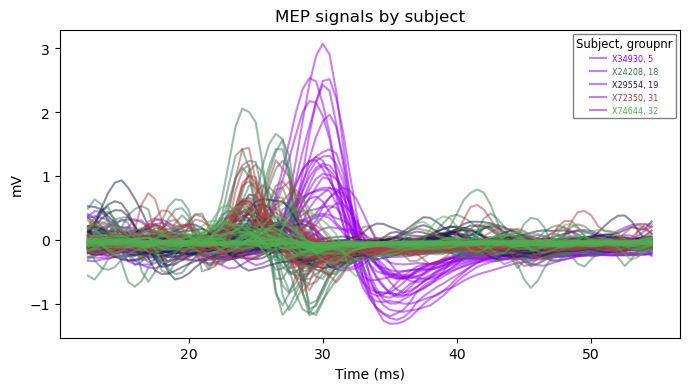

In [103]:
# Plot Specific groups
#plot_functions.plot_groups(X, groups, list_subjects=list_subjects, specifics = [5,18,19,31,32])

# Plot all subjects by coil orientations, PA and AP
#plot_coil(X,y, list_subjects, groups, mean = False, subject = None)

subject = 24 # set specific subject
plot_functions.plot_subject_coil(X,y,list_subjects,groups,mean=False,subject=subject)

##### Logistic Regression models

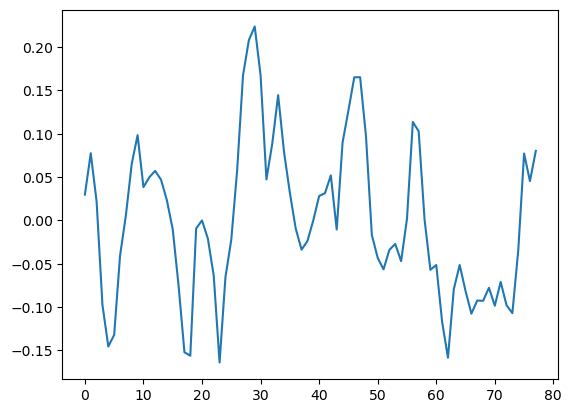

In [10]:
#print(np.mean(tot_scores))
#X_amplitude, X_latency,X_ampl_late = data.other_X(X)
#tot_scores, tot_indi_scores, mean_indi_scores = loo_logisticregression_prsubject_stratified(X_norm, y, groups, onerow = False)

#print(np.mean(tot_scores))
#score, X_train, X_test, y_train, y_test, predictions = models.logregr(X_train, X_test, y_train, y_test)
#models.confmat(y_test, predictions, score)
#print(score)
import models

tot_scores, tot_indi_scores, mean_indi_scores = models.loo_logisticregression_prsubject(X_norm, y, groups, onerow = False, LR = True, SVM = False)
#tot_scores, tot_indi_scores, mean_indi_scores = models.kfold_logisticregression_prsubject_stratified(X, y, groups, onerow = False, LR = True)

In [81]:
X_norm = data.normalize_X(X, groups)
#tot_scores, tot_indi_scores, mean_indi_scores = models.kfold_logisticregression_prsubject_stratified(X_norm, y, groups, onerow = False, LR = True)
#scores, mean_score = models.k10fold_logreg_generel_model(X_norm, y)
#tot_scores_mean = np.mean(tot_scores)
#print(f"mean score: {mean_score}")
#barplot(groups, mean_indi_scores, acc = tot_scores_mean)


tot_scores, tot_indi_scores, mean_indi_scores = models.kfold_logisticregression_prsubject_stratified(X_latency, y, groups, onerow = True, LR = True)
tot_scores_mean = np.mean(tot_scores)
#barplot(groups, mean_indi_scores, acc = tot_scores_mean)

NameError: name 'X_latency' is not defined

##### Differentiate

83


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

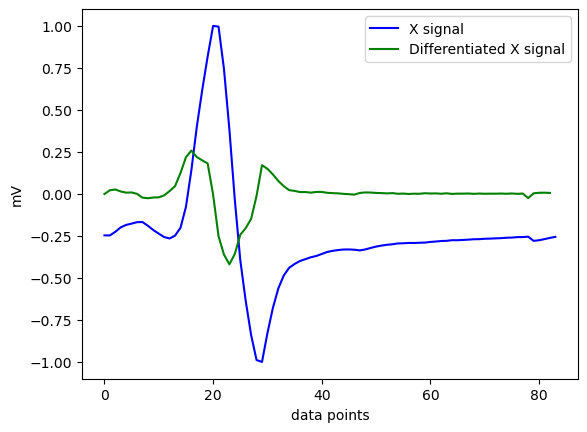

In [101]:
# Diffentiate X, Note that the first element of each row will be lost after differentiation since there is no previous element to calculate the difference with.    X_diff = np.diff(X, axis=1)
X_diff = np.diff(X, axis=1)
X_diff_norm = np.diff(X_norm, axis=0)
#X_diff_amplitude = np.diff(X_amplitude, axis=1)
#X_diff_latency = np.diff(X_latency, axis=1)

#print(len(X_diff[:,0]))
#plt.plot(X_diff[:,0])
#plt.show()
print(len(X_diff_norm[:,0]))
plt.plot(X_norm[:,124],color = "blue",label = "X signal")
plt.plot(X_diff_norm[:,124], color = "green", label = "Differentiated X signal")
plt.xlabel("data points")
plt.ylabel("mV")
plt.legend()
plt.plot

##### FFT
For other representation of the data

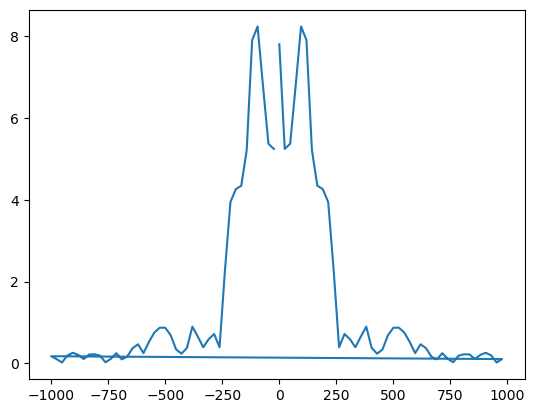

In [75]:
## fft but weird
SAMPLE_RATE = 2000  # Hertz
DURATION = 0.042  # Seconds

from scipy.fft import fft, fftfreq

inputsignal = X_norm[:,2]

# Number of samples in normalized_tone
N = int(SAMPLE_RATE * DURATION)


normalized_tone = np.array(inputsignal)

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

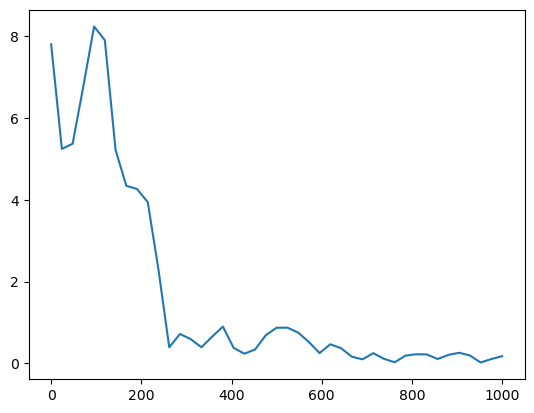

In [74]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

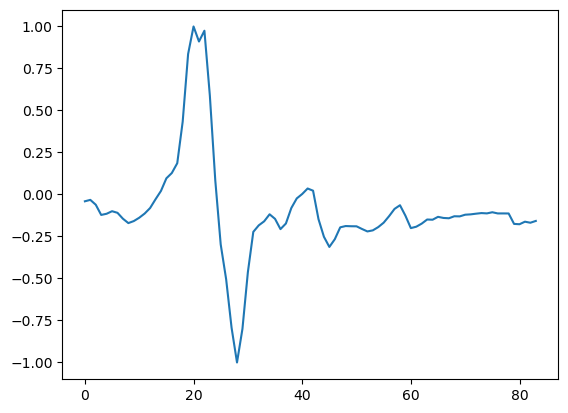

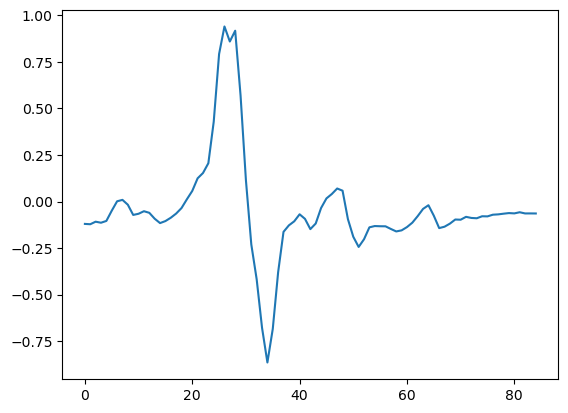

In [72]:
plt.plot(inputsignal)
plt.show()
plt.plot(X[:,2])

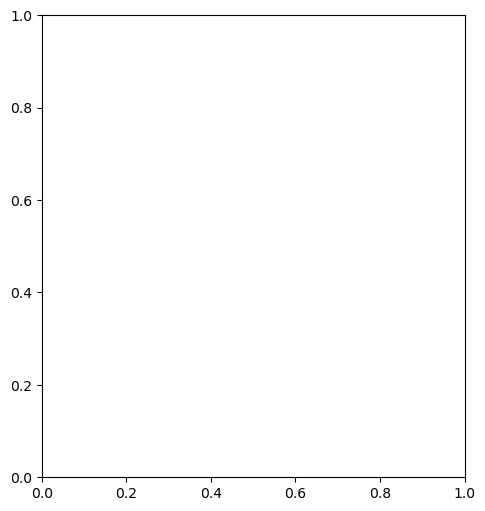

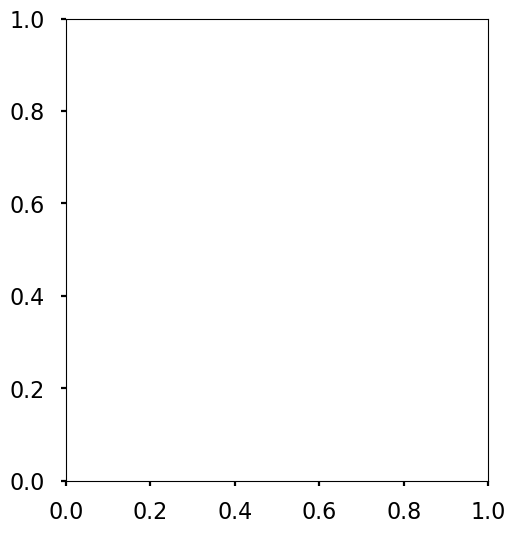

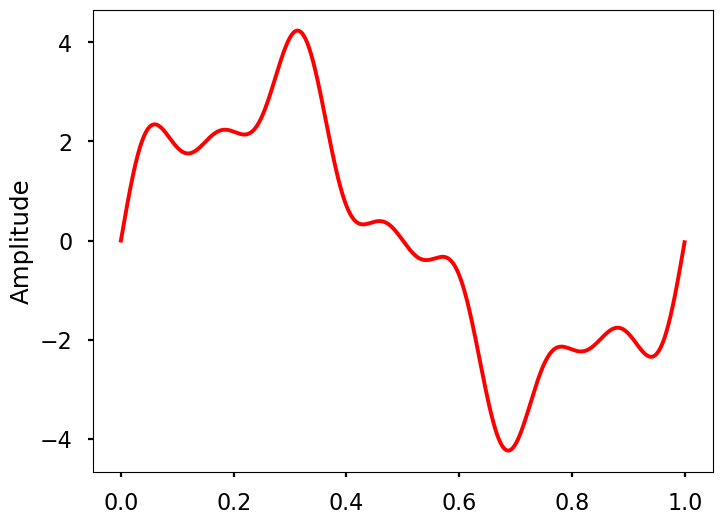

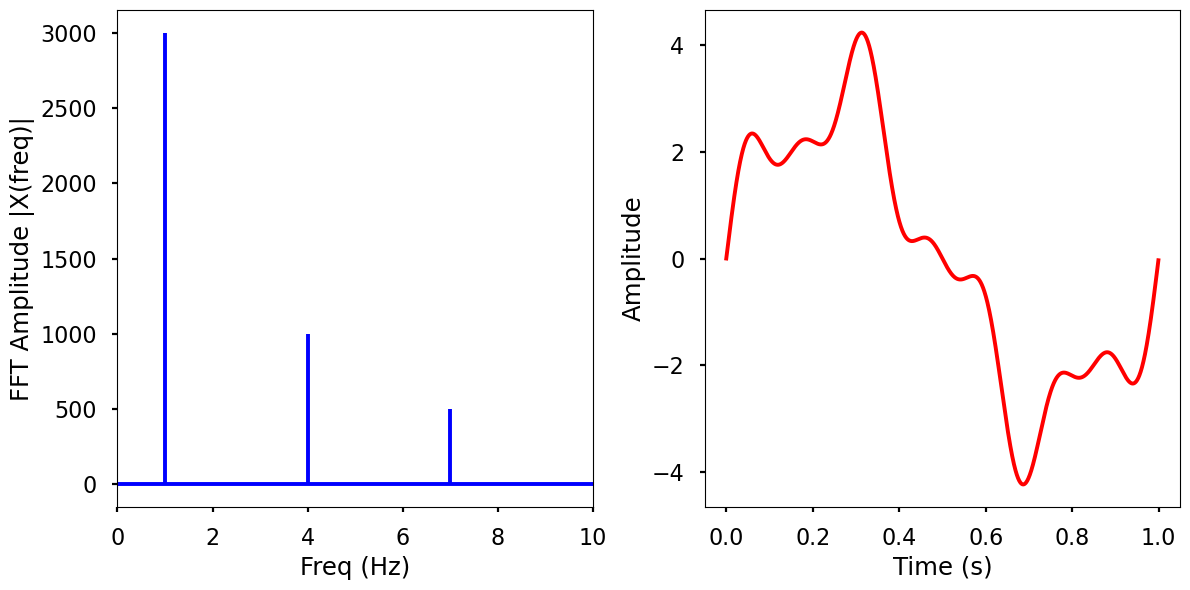

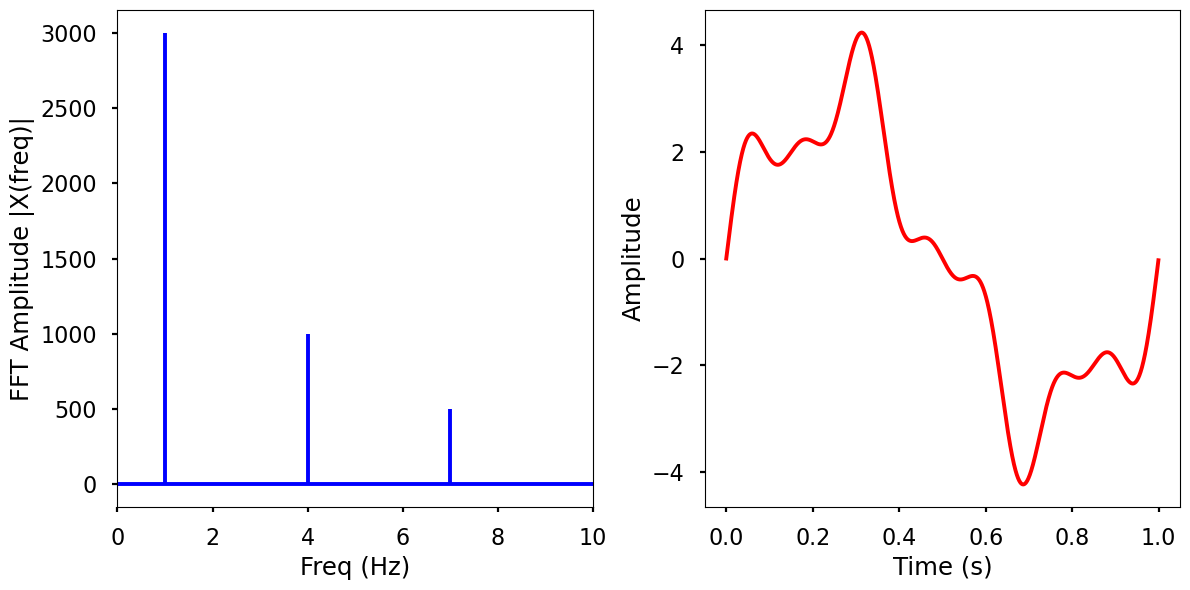

In [ ]:

from scipy.fftpack import fft, ifft
def FFT(X):
    plt.style.use('seaborn-poster')
    sr = 2000  # Sample rate (Hz)
    ts = 1.0/sr # sampling interval
    t = np.arange(0,1,ts)

    X = fft(X)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T

    plt.figure(figsize = (12, 6))
    plt.subplot(121)

    plt.stem(freq, np.abs(X), 'b', \
             markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    plt.xlim(0, 10)

    plt.subplot(122)
    plt.plot(t, ifft(X), 'r')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    '''

    for i in range(np.transpose(X).shape[0]):
        # Compute the power spectrum for signal i
        ps = np.abs(np.fft.rfft(np.transpose(X)[i])) ** 2
        
        # Compute the corresponding frequencies
        freqs = np.fft.rfftfreq(len(np.transpose(X)[i]), d=1/fs)
        
        # Plot the power spectrum for signal i
        plt.plot(freqs, ps)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power')
        plt.title(f'Power spectrum for signal {i+1}')
        plt.show()
    ''' 
    X_fft = np.fft.fft(X, axis=0)# virker ikke
    return X_fft


X_fft = FFT(X) #prøv også X_norm



##### CNN, RNN, LSTM models

In [ ]:
tot_scores, tot_indi_scores, mean_indi_scores = nnmodels.SimpleRNN(X, y, groups)
# CNN add weight decay og dropout, over flere epochs, flere conv lag
# transformer med attention, for at lave et andet featuresæt der kan mappe tidsserien en embedding der viser convolutive repræsenterer ikke hvor i serien det sker. 
# tidspunktet skal embeddes i vektoren, vi ved ikke helt hvordan. FIND EN EMBEDDING - se i transformer ecg data om der er en embedding. 


##### Transformer model
For attention embedding of the data